# Voorbeelden team Euler

In [1]:
from procedures import *
import matplotlib.pyplot as plt

### De procedure `xsample(n,a,b)`

Deze functie genereert een vector (ndarray) van lengte n met uniform verdeelde getallen tussen a en b.

In [13]:
# creëer een vector met 30 x-waarden tussen 0 en 20
xVector = xsample(30,0,20)

print("Vector X:")
print(xVector)

Vector X:
[15.61732181 14.70932242  1.13333732  9.08850577 12.04974846  3.38409158
 16.00811156  1.65975824 16.79066189  9.11059566 17.74500412 12.15014212
 15.57599685 12.07484901 16.04181441 13.31894336  6.79928037 13.3015986
 16.32194312 13.28527282 16.91964824  8.39421481  7.38106127  5.71781676
  5.95357045  6.27401754 14.17996259 18.83007385 18.9259076   2.79410215]


### De procedure `ysample(x,f,e)`

Deze functie genereert een vector (ndarray) van dezelfde lengte als vector x volgens de formule $y=f(x)+r$ met r normaal verdeelde getallen met gemiddelde nul en standaarddeviatie $e$.

In [14]:
# een parabolische functie ter illustratie
# we gaan ons op deze functie baseren om de datapunten te genereren
# vervolgens gaan we aan de functiewaarden een error-term toevoegen
def f(x):
    return x**2

# creëer een vector met 20 y-waarden zodat bij de functiewaarden van de parabolische functie een error-term epsilon wordt toegevoegd
# deze epsilon-term is een random getal tussen -e en e en de error-termen hebben een gemiddelde van 0
# hoe groter de epsilon (e), hoe groter de spreidin/afwijking van de punten rond de parabool
# de gemiddelde afstand van alle punten tot de parabool blijft echter 0
yVector = ysample(xVector, f, e=30)

print("Vector Y:")
print(yVector)

Vector Y:
[259.69595176 196.77272149   3.98642182  92.93967697 150.07006586
  -6.08877632 255.12978459 -18.92384764 288.38615289  53.12763891
 292.76240668 174.77598051 270.73182997  85.53620125 298.84341568
 155.53939442  82.88884539 172.14374678 256.35644487 170.00394916
 336.70083756  82.22724097 -11.92282981  62.02138402  48.64517984
  69.4778226  181.41004902 371.57938925 345.67660062 -22.59127696]


### De procedure `ols(y,x)`

Deze functie berekent de Ordinary Least Squares (OLS) regressierechte bij gegeven vectoren y en x. De functie geeft een koppel (a,b) terug zodat $y = a*x + b$ de regressierechte is. Hierbij komt a overeen met $β_1$ en b met $β_0$ (zie pagina 71 van ISL, waar $y = β_1*x + β_0$).

In [4]:
# Benodigdheden: zie vorige sections
xVector = xsample(30,0,20)
def f(x):
    return x**2
yVector = ysample(xVector, f, e=30)

# genereer een koppel (a,b)
# dit komt eigenlijk overeen met een koppel (beta1, beta0)
(a,b) = ols(yVector, xVector)

# print de helling en de intercept op 3 decimalen nauwkeurig
print("%.3f is de helling van de OLS regressielijn (a = beta1)" % a)
print("%.3f is de intercept van de OLS regressielijn (b = beta0)" % b, end="\n\n")

# de functie f^ (f met een hoedje)
def geschatteFunctie(x):
    return a*x + b

# druk het voorschrift van onze geschatte functie af
import sympy as sp
x = sp.symbols('x')
print(f"Functievoorschrift schattingsfunctie:\t\t\t{geschatteFunctie(x)}")

# schat de functiewaarde van x=4 en x=15 op basis van onze geschatte functie
print(f"Voorspelde functiewaarde voor x=2 via OLS regressie:\t{geschatteFunctie(4)}")
print(f"Voorspelde functiewaarde voor x=10 via OLS regressie:\t{geschatteFunctie(15)}")

19.311 is de helling van de OLS regressielijn (a = beta1)
-51.623 is de intercept van de OLS regressielijn (b = beta0)

Functievoorschrift schattingsfunctie:			19.3112816766281*x - 51.6234088670137
Voorspelde functiewaarde voor x=2 via OLS regressie:	25.621717839498544
Voorspelde functiewaarde voor x=10 via OLS regressie:	238.04581628240726


### De procedure `knn(x0,y,x,k)`

Deze functie berekent de voorspelling(en) in x0 volgens *__enkelvoudige__* KNN-regressie bij gegeven regressor x en respons y (ndarray).

In [17]:
# We voorspellen de y-waarden in de punten x=4 en x=10 op basis van de 3 dichtste buren.
voorspeldeFunctiewaardenKnn = knn(np.array([4,10]),yVector,xVector,3)

print(f"Voorspelde functiewaarden voor x=4 en x=10 via KNN: {voorspeldeFunctiewaardenKnn}")

Voorspelde functiewaarden voor x=4 en x=10 via KNN: [11.11377691 76.09818561]


### De procedure `mknn(x0,y,x,k)`

Deze functie berekent de voorspelling(en) in x0 volgens *__meervoudige__* KNN-regressie bij gegeven regressor x (matrix met punten met meerdere x-waarden) en respons y (ndarray).

In [18]:
x1 = xsample(20, 0, 1)
x2 = xsample(20, 0, 1)

xMatrix = np.column_stack((x1, x2))
x0Matrix = np.column_stack(([1, 2, 3], [3, 2, 1]))

y = ysample(1+x1+x2, f)

print("Voorspellingen in de punten (1,3), (2,2) en (3,1) met meervoudige KNN-regressie:")
print(mknn(x0Matrix, y, xMatrix, 3))

Voorspellingen in de punten (1,2), (2,2) en (3,1) met meervoudige KNN-regressie:
[7.22763176 7.22763176 7.59862689]


### De procedure `mls(y,x)`

Deze functie genereert een vector beta zodat $y=X*beta$ het kleinste kwadratenhypervlak is bij gegeven matrix X en responsvector Y (ndarray).

In [19]:
# x_i1
xVector1 = xsample(20,0,1)
# x_i2
xVector2 = xsample(20,0,1)

def f(x):
    return x

yVector = ysample(1+xVector1+xVector2,f)

# we voegen een kolom met eentjes toe aan onze matrix
xMatrix = np.column_stack((np.ones(len(xVector1)),xVector1, xVector2))

beta = mls(yVector,xMatrix)
print(f"Beta: {beta}")

Beta: [ 1.65443511 -0.55060855  1.08798   ]


### De procedure `berekenKOpt(trainingX,trainingY,validatieX,validatieY,enkelvoudig)`

Deze functie berekent de optimale K-waarde $K_{\text{opt}}$ voor enkelvoudige en meervoudige KNN-regressie.

#### Enkelvoudige regressie

Hierbij is de laatste parameter `enkelvoudig` gelijk aan `True`.

In [20]:
trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

kOptEnkv = berekenKOpt(trainingX,trainingY,validatieX,validatieY,True)
print("De optimale K-waarde bij meervoudige regressie: " + str(kOptEnkv))

De optimale K-waarde bij meervoudige regressie: 9


#### Meervoudige regressie

Hierbij is de laatste parameter `enkelvoudig` gelijk aan `False`.

In [10]:
trainingX1 = xsample(20,0,1)
trainingX2 = xsample(20,0,1)

validatieX1 = xsample(1000,0,1)
validatieX2 = xsample(1000,0,1)

trainingXMatrix = np.column_stack((trainingX1, trainingX2))
validatieXMatrix = np.column_stack((validatieX1, validatieX2))

trainingY = ysample(trainingX1+trainingX2,f)
validatieY = ysample(validatieX1+validatieX2,f)

kOptMeerv = berekenKOpt(trainingXMatrix,trainingY,validatieXMatrix,validatieY,False)
print("De optimale K-waarde bij meervoudige regressie: " + str(kOptMeerv))

De optimale K-waarde bij meervoudige regressie: 7


### De procedure `berekenPOpt(trainingX,trainingY,validatieX,validatieY)`

Deze functie berekent de optimale p-waarde voor polynomiale regressie.

In [21]:
def f(x):
    return 10**x

trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

pOpt = berekenPOpt(trainingX,trainingY,validatieX,validatieY)

print(f"{pOpt} is de optimale graad voor polynomiale regressie.")

2 is de optimale graad voor polynomiale regressie.


### De procedure `coefficienten(beta,xx)`

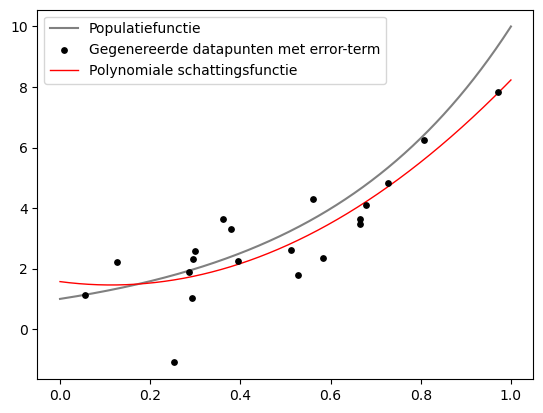

In [23]:
# Populatiefunctie
def f(x):
    return 10**x

# Nodige gegevens
trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)
X = np.column_stack([trainingX**i for i in range(pOpt+1)])
beta = mls(trainingY,X)
xx = np.linspace(0,1,1000)

# we geven de vector beta mee, alsook de x-waarden waarvoor we de coeffecienten willen berekenen
coef = coefficienten(beta,xx)

# De voorspelling
polynomVoorspelling = np.dot(coef, beta)

plt.figure()
plt.plot(xx, f(xx), color='grey', label="Populatiefunctie")
plt.scatter(trainingX, trainingY, c='k', s=15, label="Gegenereerde datapunten met error-term", zorder=3)
plt.plot(xx,polynomVoorspelling,'r-', lw=1 ,label="Polynomiale schattingsfunctie")
plt.legend()
plt.show()